In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import visuals as vs
from sklearn.cluster import KMeans
from IPython.display import display # 使得我们可以对DataFrame使用display()函数

# 设置以内联的形式显示matplotlib绘制的图片（在notebook中显示更美观）
%matplotlib inline
# 高分辨率显示
# %config InlineBackend.figure_format='retina'

# 载入整个客户数据集
try:
    data = pd.read_csv("air_data.csv",encoding="utf-8")
#     data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 62988 samples with 44 features each.


In [2]:
data.columns.values.tolist()

['MEMBER_NO',
 'FFP_DATE',
 'FIRST_FLIGHT_DATE',
 'GENDER',
 'FFP_TIER',
 'WORK_CITY',
 'WORK_PROVINCE',
 'WORK_COUNTRY',
 'AGE',
 'LOAD_TIME',
 'FLIGHT_COUNT',
 'BP_SUM',
 'EP_SUM_YR_1',
 'EP_SUM_YR_2',
 'SUM_YR_1',
 'SUM_YR_2',
 'SEG_KM_SUM',
 'WEIGHTED_SEG_KM',
 'LAST_FLIGHT_DATE',
 'AVG_FLIGHT_COUNT',
 'AVG_BP_SUM',
 'BEGIN_TO_FIRST',
 'LAST_TO_END',
 'AVG_INTERVAL',
 'MAX_INTERVAL',
 'ADD_POINTS_SUM_YR_1',
 'ADD_POINTS_SUM_YR_2',
 'EXCHANGE_COUNT',
 'avg_discount',
 'P1Y_Flight_Count',
 'L1Y_Flight_Count',
 'P1Y_BP_SUM',
 'L1Y_BP_SUM',
 'EP_SUM',
 'ADD_Point_SUM',
 'Eli_Add_Point_Sum',
 'L1Y_ELi_Add_Points',
 'Points_Sum',
 'L1Y_Points_Sum',
 'Ration_L1Y_Flight_Count',
 'Ration_P1Y_Flight_Count',
 'Ration_P1Y_BPS',
 'Ration_L1Y_BPS',
 'Point_NotFlight']

In [3]:
# 显示数据集的一个描述

print(data.shape)
display(data.describe().T)

(62988, 44)


,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,62988.0,31494.500000,18183.213715,1.00,15747.750000,31494.500000,47241.250000,62988.000000
FFP_TIER,62988.0,4.102162,0.373856,4.00,4.000000,4.000000,4.000000,6.000000
AGE,62568.0,42.476346,9.885915,6.00,35.000000,41.000000,48.000000,110.000000
FLIGHT_COUNT,62988.0,11.839414,14.049471,2.00,3.000000,7.000000,15.000000,213.000000
BP_SUM,62988.0,10925.081254,16339.486151,0.00,2518.000000,5700.000000,12831.000000,505308.000000
EP_SUM_YR_1,62988.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
EP_SUM_YR_2,62988.0,265.689623,1645.702854,0.00,0.000000,0.000000,0.000000,74460.000000
SUM_YR_1,62437.0,5355.376064,8109.450147,0.00,1003.000000,2800.000000,6574.000000,239560.000000
SUM_YR_2,62850.0,5604.026014,8703.364247,0.00,780.000000,2773.000000,6845.750000,234188.000000
SEG_KM_SUM,62988.0,17123.878691,20960.844623,368.00,4747.000000,9994.000000,21271.250000,580717.000000


In [4]:
import pandas as pd
explore = data.describe(percentiles = [],include = 'all').T
explore

,count,unique,top,freq,mean,std,min,50%,max
MEMBER_NO,62988,NaN,NaN,NaN,31494.5,18183.2,1,31494.5,62988
FFP_DATE,62988,3068,2011/01/13,184,NaN,NaN,NaN,NaN,NaN
FIRST_FLIGHT_DATE,62988,3406,2013/02/16,96,NaN,NaN,NaN,NaN,NaN
GENDER,62985,2,男,48134,NaN,NaN,NaN,NaN,NaN
FFP_TIER,62988,NaN,NaN,NaN,4.10216,0.373856,4,4,6
WORK_CITY,60719,3310,广州,9385,NaN,NaN,NaN,NaN,NaN
WORK_PROVINCE,59740,1185,广东,17507,NaN,NaN,NaN,NaN,NaN
WORK_COUNTRY,62962,118,CN,57748,NaN,NaN,NaN,NaN,NaN
AGE,62568,NaN,NaN,NaN,42.4763,9.88591,6,41,110
LOAD_TIME,62988,1,2014/03/31,62988,NaN,NaN,NaN,NaN,NaN


In [5]:
explore ['null']=len(data)-explore['count']  # 计算异常值数量
explore = explore[['null','max','min']]   # 选取数据列
explore.columns = [u'空值数',u'最大值',u'最小值']   # 更改标题
explore

,空值数,最大值,最小值
MEMBER_NO,0,62988,1
FFP_DATE,0,NaN,NaN
FIRST_FLIGHT_DATE,0,NaN,NaN
GENDER,3,NaN,NaN
FFP_TIER,0,6,4
WORK_CITY,2269,NaN,NaN
WORK_PROVINCE,3248,NaN,NaN
WORK_COUNTRY,26,NaN,NaN
AGE,420,110,6
LOAD_TIME,0,NaN,NaN


In [6]:
import math
data = data[data["SUM_YR_1"].notnull() & data["SUM_YR_2"].notnull()]
index1 = data["SUM_YR_1"] != 0
index2 = data["SUM_YR_2"] != 0
index3 = (data["SEG_KM_SUM"] == 0) & (data["avg_discount"] == 0)
index4 = data["AGE"] !=0
data = data[index1 | index2| index3 |index4 ]
data.dropna(inplace = True)
print(data.shape)

(58255, 44)


In [7]:
data = data[[ "FFP_DATE","AGE" ,"LOAD_TIME", "FLIGHT_COUNT","LAST_TO_END" ,"SUM_YR_1", "SUM_YR_2", "SEG_KM_SUM", "AVG_INTERVAL" , "MAX_INTERVAL", "avg_discount"]]
data[0:5]

,FFP_DATE,AGE,LOAD_TIME,FLIGHT_COUNT,LAST_TO_END,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,AVG_INTERVAL,MAX_INTERVAL,avg_discount
0,2006/11/02,31.0,2014/03/31,210,1,239560.0,234188.0,580717,3.483254,18,0.961639
2,2007/02/01,40.0,2014/03/31,135,11,163618.0,164982.0,283712,5.298507,18,1.254676
3,2008/08/22,64.0,2014/03/31,23,97,116350.0,125500.0,281336,27.863636,73,1.090870
4,2009/04/10,48.0,2014/03/31,152,5,124560.0,130702.0,309928,4.788079,47,0.970658
5,2008/02/10,64.0,2014/03/31,92,79,112364.0,76946.0,294585,7.043956,52,0.967692


In [8]:
data["LOAD_TIME"] = pd.to_datetime(data["LOAD_TIME"])
data["FFP_DATE"] = pd.to_datetime(data["FFP_DATE"])
data["TIME"] = data["LOAD_TIME"] - data["FFP_DATE"]
data['TIME'] = data['TIME'].astype(np.int64)/(60*60*24*10**9)
data = data[[ "TIME","AGE" , "FLIGHT_COUNT","LAST_TO_END" ,"SUM_YR_1", "SUM_YR_2",
             "SEG_KM_SUM", "AVG_INTERVAL" , "MAX_INTERVAL", "avg_discount"]]
data.head()

,TIME,AGE,FLIGHT_COUNT,LAST_TO_END,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,AVG_INTERVAL,MAX_INTERVAL,avg_discount
0,2706.0,31.0,210,1,239560.0,234188.0,580717,3.483254,18,0.961639
2,2615.0,40.0,135,11,163618.0,164982.0,283712,5.298507,18,1.254676
3,2047.0,64.0,23,97,116350.0,125500.0,281336,27.863636,73,1.090870
4,1816.0,48.0,152,5,124560.0,130702.0,309928,4.788079,47,0.970658
5,2241.0,64.0,92,79,112364.0,76946.0,294585,7.043956,52,0.967692


In [9]:
# data["平均每公里票价"] = (data["SUM_YR_1"] + data["SUM_YR_2"]) / data["SEG_KM_SUM"]
# data["时间间隔差值"] = data["MAX_INTERVAL"] - data["AVG_INTERVAL"]
# deal_data = data.rename(
#     columns = {"FLIGHT_COUNT" : "飞行次数", "SEG_KM_SUM" : "总里程", "avg_discount" : "平均折扣率"},
#     inplace = False
# )
# filter_data = deal_data[["入会时间", "飞行次数", "平均每公里票价", "总里程", "时间间隔差值", "平均折扣率"]]
# filter_data

In [10]:
indices = [2,91,200]

# 为选择的样本建立一个DataFrame
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)

Chosen samples of wholesale customers dataset:


,TIME,AGE,FLIGHT_COUNT,LAST_TO_END,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,AVG_INTERVAL,MAX_INTERVAL,avg_discount
0,2615.0,40.0,135,11,163618.0,164982.0,283712,5.298507,18,1.254676
1,1155.0,54.0,42,15,23150.0,65152.0,162453,15.658537,136,0.966069
2,3260.0,46.0,58,16,65404.0,43909.0,94554,12.350877,89,1.299097


In [11]:
# TODO：为DataFrame创建一个副本，用'drop'函数丢弃一个特征# TODO： 
new_data = data.drop(['TIME'],axis=1)
target=data['TIME']
# TODO：使用给定的特征作为目标，将数据分割成训练集和测试集\
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test =train_test_split(new_data,target, test_size=0.25, random_state=42)

# TODO：创建一个DecisionTreeRegressor（决策树回归器）并在训练集上训练它
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
regressor = DecisionTreeRegressor(max_depth=4,min_samples_split=2,
                                 min_samples_leaf=4)
regressor.fit(X_train,y_train)
y_test_pred=regressor.predict(X_test)
y_train_pred=regressor.predict(X_train)

# TODO：输出在测试集上的预测得分
score_test=r2_score(y_test,y_test_pred)
score_train=r2_score(y_train,y_train_pred)
print(score_test,score_train)

0.13050119119421333 0.13359546488506202


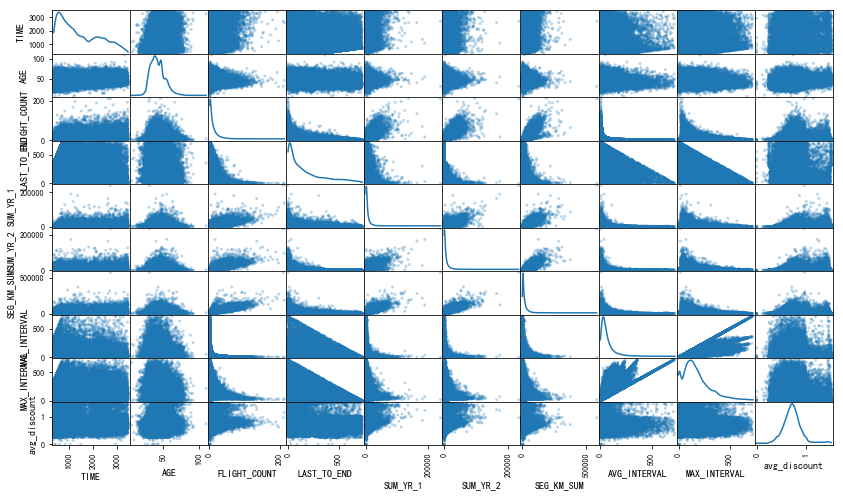

In [12]:
from pylab import *  
mpl.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus']=False
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

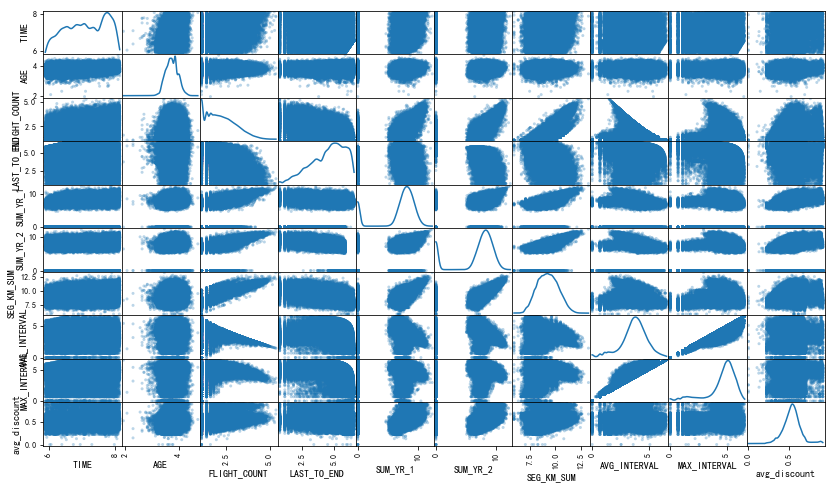

In [13]:
from pylab import *  
mpl.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus']=False
log_data = np.log(data+1)

# TODO：使用自然对数缩放样本数据
log_samples = np.log(samples+1)

# 为每一对新产生的特征制作一个散射矩阵
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [14]:
display(log_samples)

,TIME,AGE,FLIGHT_COUNT,LAST_TO_END,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,AVG_INTERVAL,MAX_INTERVAL,avg_discount
0,7.869402,3.713572,4.912655,2.484907,12.005296,12.013598,12.555718,1.840313,2.944439,0.813006
1,7.052721,4.007333,3.761200,2.772589,10.049793,11.084494,11.998150,2.812923,4.919981,0.676036
2,8.089789,3.850148,4.077537,2.833213,11.088354,10.689897,11.456937,2.591582,4.499810,0.832517


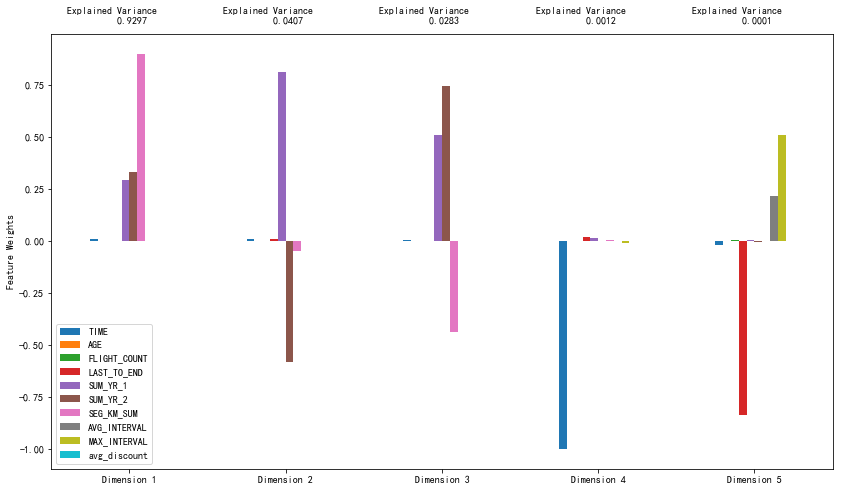

In [15]:
# TODO：通过在good data上进行PCA，将其转换成6个维度
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(data)

# 生成PCA的结果图
pca_results = vs.pca_results(data, pca)